### Avaliação 02 - Riyadh Silva & Jefferson Pires
#### Resoluções

1 - Sobre o dataset:

    a. Nome: Bank Marketing Data Set 
    
       Descrição: Os dados estão relacionados com campanhas de marketing direta de uma instituição bancária portuguesa. As campanhas de marketing foram baseadas em chamadas telefônicas. Muitas vezes, era necessário contatar mais de uma vez o mesmo cliente, a fim de acessar se o produto (depósito a prazo bancário) seria assinado ('sim') ou não ('não').
       
       Volume de dados: Número de instâncias - 45211 ; Número de atributos - 20. 
       
    b. Principais colunas e seus significados:
    
    As seguintes colunas referem-se aos dados bancários do cliente
        1 - Idade (numérico)
        2 - Trabalho: tipo de trabalho (categórico)
        3 - Conjugal: estado civil (categórico)
        4 - Educação: nível de instrução educacional (categórico)
        5 - Default: tem crédito como padrão? (categórico)
        6 - Habitação: tem empréstimo  habitacional? (categórico)
        7 - Empréstimo: tem empréstimo pessoal? (categórico)
        
    As seguintes colunas estão relacionadas com o último contato da campanha atual
        8 - Contato: com qual meio de comunicação se entrou em contato (categórico)
        9 - Mês: mês referente a último contato do ano (categórico)
        10 - Dia da semana: último dia de contato da semana (categórico)
        11 - Duração: a duração do último contato, em segundos (numérico). Nota importante: Esse atributo afeta altamente o destino de saída (Se a duração = 0 então y = 'no'). No entanto, a duração não é conhecida antes de uma chamada ser executada. Além disso, após o término da chamada, é obviamente conhecida. Assim, essa entrada deve ser incluída apenas para fins de benchmark e deve ser descartada se a intenção for ter um modelo preditivo realista.
        
    As seguintes colunas estão relacionadas com as campanhas
        12 - Campanha: número de contatos realizados durante a campanha e para este cliente (numérico)
        13 - Pdays: número de dias que se passaram depois que o cliente foi contatado pela última vez em uma campanha anterior (numérico; número 999 significa que o cliente não foi previamente contactado)
        14 - Anterior: número de contatos realizados antes desta campanha e para este cliente (numérico)
        15 - Poutcome: resultado da campanha de marketing anterior (categórico).
        
    As seguintes colunas estão relacionadas com atributos de contexto social e econômico
        16 - Emp.var.rate: taxa de variação do emprego - indicador trimestral (numérico)
        17 - Cons.price.idx: índice de preços ao consumidor - indicador mensal (numérico)
        18 - Cons.conf.idx: índice de confiança do consumidor - indicador mensal (numérico)
        19 - Euribor3m: euribor taxa de 3 meses - indicador diário (numérico)
        20 - Nr.employed: número de empregados - indicador trimestral (numérico)
        
    c. O objetivo do dataset:
    A seguinte coluna refere-se a variável de saída (alvo desejado)
        21 - Y: o cliente assinou um depósito a prazo (binário: 'sim','não')
        
       
        

2 - Análise dos dados

In [1]:
import pandas as pd
df = pd.read_csv('bank-additional-full.csv')

a - Tipos das colunas

In [2]:
df.info()
# age, duration, campaign, pdays, previous são valores numéricos não nulos do tipo int64
# emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed são valores numéricos não nulos do tipo float64
# as demais colunas são valores não nulos do tipo objeto str (strings)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

b - Campos nulos

In [3]:
pos = 0
while(pos < 21):
    print(df.columns[pos], ' : ',pd.isnull(df.columns[pos]))
    pos = pos + 1
# Não existem campos nulos no dataset

age  :  False
job  :  False
marital  :  False
education  :  False
default  :  False
housing  :  False
loan  :  False
contact  :  False
month  :  False
day_of_week  :  False
duration  :  False
campaign  :  False
pdays  :  False
previous  :  False
poutcome  :  False
emp.var.rate  :  False
cons.price.idx  :  False
cons.conf.idx  :  False
euribor3m  :  False
nr.employed  :  False
y  :  False


c - Variáveis categóricas

Existem 10 colunas com variáveis categóricas:
    
- job : tipo de trabalho (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

- marital : estado civil (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

- education: nível de instrução (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

- default: O cliente tem crédito como padrão? (categorical: 'no','yes','unknown')

- housing: O cliente tem empréstimo habitacional? (categorical: 'no','yes','unknown')

- loan: O cliente tem emrpéstimo pessoal? (categorical: 'no','yes','unknown')

- contact: tipo de meio de comunicação usado para contato (categorical: 'cellular','telephone') 

- month: último mês de contato do ano (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

- day_of_week: último dia de contato durante a semana (categorical: 'mon','tue','wed','thu','fri')

- poutcome: resultado da campanha de marketing anterior (categorical: 'failure','nonexistent','success')

In [4]:
# 1 - Job
for u in df.job.unique():
    print(u)

housemaid
services
admin.
blue-collar
technician
retired
management
unemployed
self-employed
unknown
entrepreneur
student


In [5]:
# 2 - Marital
for u in df.marital.unique():
    print(u)

married
single
divorced
unknown


In [6]:
# 3 - Education
for u in df.education.unique():
    print(u)

basic.4y
high.school
basic.6y
basic.9y
professional.course
unknown
university.degree
illiterate


In [7]:
# 4 - Default
for u in df.default.unique():
    print(u)

no
unknown
yes


In [8]:
# 5 - Housing
for u in df.housing.unique():
    print(u)

no
yes
unknown


In [9]:
# 6 - Loan
for u in df.loan.unique():
    print(u)

no
yes
unknown


In [10]:
# 7 - Contact
for u in df.contact.unique():
    print(u)

telephone
cellular


In [11]:
# 8 - Month
for u in df.month.unique():
    print(u)

may
jun
jul
aug
oct
nov
dec
mar
apr
sep


In [12]:
# 9 - Day_of_week
for u in df.day_of_week.unique():
    print(u)

mon
tue
wed
thu
fri


In [13]:
# 10 - Poutcome
for u in df.poutcome.unique():
    print(u)

nonexistent
failure
success


d - Campos novos criados com justificativa
- Neste primeiro momento será necessário criar novas colunas em virtude das variavéis categóricas

In [14]:
# Antes da criação das novas colunas, temos 21 colunas
len(df.columns)

21

In [15]:
# Converte yes em 1 e not em 0 na coluna y (Letra f - Necessário aplicar aqui antes do pd.get_dummies, pois senão seriam criadas duas colunas desnecessárias, y_yes e y_no)
df.y.replace(('yes', 'no'), (1, 0), inplace=True)
y = df.y

In [16]:
# Tratamento das variáveis categóricas
df = df.drop(columns=['y'])
x = df
x = pd.get_dummies(x)

In [17]:
# Após a execução do algoritmo anterior 44 novas colunas foram criadas
len(x.columns)

63

In [18]:
for c in x.columns:
    print(c)

age
duration
campaign
pdays
previous
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
job_admin.
job_blue-collar
job_entrepreneur
job_housemaid
job_management
job_retired
job_self-employed
job_services
job_student
job_technician
job_unemployed
job_unknown
marital_divorced
marital_married
marital_single
marital_unknown
education_basic.4y
education_basic.6y
education_basic.9y
education_high.school
education_illiterate
education_professional.course
education_university.degree
education_unknown
default_no
default_unknown
default_yes
housing_no
housing_unknown
housing_yes
loan_no
loan_unknown
loan_yes
contact_cellular
contact_telephone
month_apr
month_aug
month_dec
month_jul
month_jun
month_mar
month_may
month_nov
month_oct
month_sep
day_of_week_fri
day_of_week_mon
day_of_week_thu
day_of_week_tue
day_of_week_wed
poutcome_failure
poutcome_nonexistent
poutcome_success


e - Campos descartados com justificativa
- Exclusão não necessária, apenas conversão de valores como as variáveis categóricas e a última coluna (presente na letra d)

f - Conversões entre tipos de colunas
- A última coluna apresentava valores binários 'yes' e 'no', foi necessário a conversão desses valores para '1' e '0' respectivamente (presente na letra d)

g - Apresente alguma técnica de análise não apresentada em sala até o momento

h - Analise, com APIs específicas, pelo menos 3 características relevantes do dataset e exiba gráficos a respeito


In [19]:
import matplotlib.pyplot as plt

A idade do público alvo

[]

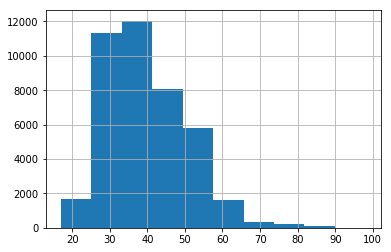

In [20]:
x.age.hist().plot()

Após a análise desse histograma nota-se que o público alvo com maior incidência possuem entre 25 e 42 anos

A distribuição dos resultados

[]

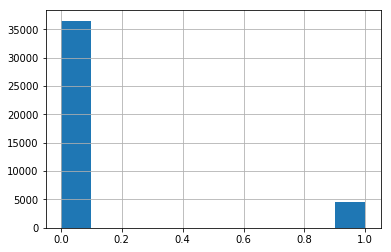

In [21]:
y.hist().plot()

Um pouco menos de 5.000 pessoas assinaram o empréstimo, enquanto mais de 35.000 recusaram a assinatura

In [22]:
# Número de pessoas que assinaram o empréstimo
cont = 0;
for n in y:
    if(n == 1):
        cont = cont + 1
print(cont)

4640


In [23]:
# Número de pessoas que não assinaram o empréstimo
cont = 0;
for n in y:
    if(n == 0):
        cont = cont + 1
print(cont)

36548


In [24]:
# A correlação entre os resultados (y) com os dados (x)
x.corrwith(y)
# Nota-se que as colunas duration, previous, contact_cellular,  poutcome_success são de suma importância para os resultados yes

age                      0.030399
duration                 0.405274
campaign                -0.066357
pdays                   -0.324914
previous                 0.230181
emp.var.rate            -0.298334
cons.price.idx          -0.136211
cons.conf.idx            0.054878
euribor3m               -0.307771
nr.employed             -0.354678
job_admin.               0.031426
job_blue-collar         -0.074423
job_entrepreneur        -0.016644
job_housemaid           -0.006505
job_management          -0.000419
job_retired              0.092221
job_self-employed       -0.004663
job_services            -0.032301
job_student              0.093955
job_technician          -0.006149
job_unemployed           0.014752
job_unknown             -0.000151
marital_divorced        -0.010608
marital_married         -0.043398
marital_single           0.054133
marital_unknown          0.005211
education_basic.4y      -0.010798
education_basic.6y      -0.023517
education_basic.9y      -0.045135
education_high

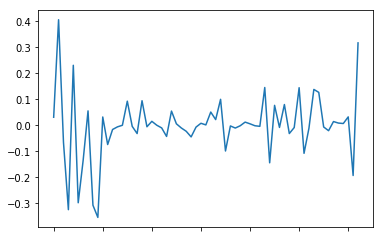

In [25]:
x.corrwith(y).plot()
# Quanto maiores os picos, maior a correlação (c > 0) quanto menor os picos menor os picos, menor a correlação (c < 0)

3 - Execução dos algoritmos

In [39]:
#Multinomial sem K-folding
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# O algoritmo multinomial não funciona com valores negativos bem como as matrizes da questão 4, como a tabela apresenta as seguintes colunas precisam ser removidas
x = x.drop(columns=['euribor3m','cons.conf.idx','emp.var.rate'])
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25,
random_state=0)

modeloMultinomial = MultinomialNB()
modeloMultinomial.fit(x_treino, y_treino)
print(modeloMultinomial.score(x_teste, y_teste))

0.8452947460425366


In [81]:
#Multinomial com K-folding
from sklearn.cross_validation import cross_val_score
import numpy as np
from scipy.stats import bayes_mvs

modeloMultinomial = MultinomialNB()
k = 10
scores = cross_val_score(modeloMultinomial, x, y, cv = k)
print(scores.mean())

0.8420655838489258


In [27]:
#Adaboost sem k-folding
from sklearn.ensemble import AdaBoostClassifier

modeloAdaBoost = AdaBoostClassifier()
modeloAdaBoost.fit(x_treino, y_treino)
print(modeloAdaBoost.score(x_teste, y_teste))

0.9132757113722444


In [30]:
#Adaboost Com k-folding
from sklearn.cross_validation import cross_val_score
k = 10
scores = cross_val_score(modeloAdaBoost, x, y, cv = k)
print(scores.mean())

0.7628089118043688


In [31]:
#OneVsRest sem K-folding
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

modeloOneVsRest = OneVsRestClassifier(LinearSVC(random_state = 0))
modeloOneVsRest.fit(x_treino, y_treino)
print(modeloOneVsRest.score(x_teste, y_teste))

0.903175682237545


In [83]:
#OneVsRest com K-folding
scores = cross_val_score(modeloOneVsRest,x,y,cv = k)
print(scores.mean())

0.8941433702380881


In [34]:
#OneVsOne sem K-folding
from sklearn.multiclass import OneVsOneClassifier
modeloOneVsOne = OneVsOneClassifier(LinearSVC(random_state = 0))
modeloOneVsOne.fit(x_treino, y_treino)
print(modeloOneVsOne.score(x_teste, y_teste))

0.903175682237545


In [35]:
#OneVsOne com K-folding
scores = cross_val_score(modeloOneVsOne,x,y,cv = k)
print(scores.mean())

0.7130482815689291


In [36]:
#Algoritmo não usado em sala - A regressão logística é usada onde uma saída discreta é esperada, 
#como a ocorrência de algum evento (ex. Prever se a chuva irá ocorrer ou não).
#fonte:https://medium.com/@cristianofurquim/10-algoritmos-de-aprendizagem-de-m%C3%A1quinas-machine-learning-que-voc%C3%AA-precisa-saber-c49f9eefe319

#LogisticRegression sem K-folding
from sklearn.linear_model import LogisticRegression
modeloLogisticRegression = LogisticRegression()
modeloLogisticRegression.fit(x_treino, y_treino)
print(modeloLogisticRegression.score(x_teste, y_teste))

0.912013207730407


In [37]:
#LogisticRegression com K-folding
scores = cross_val_score(modeloLogisticRegression,x,y,cv = k)
print(scores.mean())

0.8369598306618979


4 - Apresentação dos resultados

In [40]:
#Matriz de confusão MultinomialNB
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, log_loss

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
acuracias = []
precisoes = []
recalls = []
f1_scores = []
log_losss = []
matrizes = []

x_values = x.values
for indice_treinamento, indice_teste in kfold.split(x,np.zeros(shape=(x.shape[0], 1))):
    # print('Índice treinamento: ', indice_treinamento, 'Índice teste: ', indice_teste) 
    modelo = MultinomialNB()
    modelo.fit(x_values[indice_treinamento], y[indice_treinamento])
    previsoes = modelo.predict(x_values[indice_teste])
    acuracia = accuracy_score(y[indice_teste], previsoes)
    precisao = precision_score(y[indice_teste], previsoes)
    recall = recall_score(y[indice_teste], previsoes)
    f1Score = f1_score(y[indice_teste], previsoes)
    logLoss = log_loss(y[indice_teste], previsoes)
    
    matrizes.append(confusion_matrix(y[indice_teste], previsoes))
    acuracias.append(acuracia)
    precisoes.append(precisao)
    f1_scores.append(f1Score)
    recalls.append(recall)
    log_losss.append(logLoss)
    

matriz_final = np.mean(matrizes, axis=0)
acuracias = np.asarray(acuracias)
precisoes = np.asarray(precisoes)
recalls = np.asarray(recalls)
f1_scores = np.asarray(f1_scores)
log_losss = np.asarray(log_losss)

print(acuracia.mean())
print(precisao.mean())
print(recalls.mean())
print(f1_scores.mean())
print(log_losss.mean())
print(matriz_final)

0.8467702768334143
0.38209331651954603
0.6914285571952937
0.49760788156400854
5.428955979931422
[[3150.6  504.2]
 [ 143.2  320.8]]


In [149]:
#Matriz de confusão AdaBoostClassifier
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
acuracias = []
precisoes = []
recalls = []
f1_scores = []
log_losss = []
matrizes = []

for indice_treinamento, indice_teste in kfold.split(x,np.zeros(shape=(x.shape[0], 1))):
    # print('Índice treinamento: ', indice_treinamento, 'Índice teste: ', indice_teste) 
    modelo = AdaBoostClassifier()
    modelo.fit(x_values[indice_treinamento], y[indice_treinamento])
    previsoes = modelo.predict(x_values[indice_teste])
    acuracia = accuracy_score(y[indice_teste], previsoes)
    precisao = precision_score(y[indice_teste], previsoes)
    recall = recall_score(y[indice_teste], previsoes)
    f1Score = f1_score(y[indice_teste], previsoes)
    logLoss = log_loss(y[indice_teste], previsoes)
    
    matrizes.append(confusion_matrix(y[indice_teste], previsoes))
    acuracias.append(acuracia)
    precisoes.append(precisao)
    f1_scores.append(f1Score)
    recalls.append(recall)
    log_losss.append(logLoss)
    
matriz_final = np.mean(matrizes, axis=0)
acuracias = np.asarray(acuracias)
precisoes = np.asarray(precisoes)
recalls = np.asarray(recalls)
f1_scores = np.asarray(f1_scores)
log_losss = np.asarray(log_losss)

print(acuracia.mean())
print(precisao.mean())
print(recalls.mean())
print(f1_scores.mean())
print(log_losss.mean())
print(matriz_final)

0.9089363768819816
0.6352941176470588
0.3945942663248528
0.4925894267530757
3.158049605381531
[[3559.    95.8]
 [ 280.8  183.2]]


In [41]:
#Matriz de confusão OneVsRestClassifier
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
acuracias = []
precisoes = []
recalls = []
f1_scores = []
log_losss = []
matrizes = []

for indice_treinamento, indice_teste in kfold.split(x,np.zeros(shape=(x.shape[0], 1))):
    # print('Índice treinamento: ', indice_treinamento, 'Índice teste: ', indice_teste) 
    modelo = OneVsRestClassifier(LinearSVC(random_state = 0))
    modelo.fit(x_values[indice_treinamento], y[indice_treinamento])
    previsoes = modelo.predict(x_values[indice_teste])
    acuracia = accuracy_score(y[indice_teste], previsoes)
    precisao = precision_score(y[indice_teste], previsoes)
    recall = recall_score(y[indice_teste], previsoes)
    f1Score = f1_score(y[indice_teste], previsoes)
    logLoss = log_loss(y[indice_teste], previsoes)
    
    matrizes.append(confusion_matrix(y[indice_teste], previsoes))
    acuracias.append(acuracia)
    precisoes.append(precisao)
    f1_scores.append(f1Score)
    recalls.append(recall)
    log_losss.append(logLoss)
    
matriz_final = np.mean(matrizes, axis=0)
acuracias = np.asarray(acuracias)
precisoes = np.asarray(precisoes)
recalls = np.asarray(recalls)
f1_scores = np.asarray(f1_scores)
log_losss = np.asarray(log_losss)

print(acuracia.mean())
print(precisao.mean())
print(recalls.mean())
print(f1_scores.mean())
print(log_losss.mean())
print(matriz_final)

0.9011656143759106
0.5640138408304498
0.39641981921036373
0.31635150941219536
8.866860573790557
[[2879.8  775. ]
 [ 282.4  181.6]]


In [42]:
#Matriz de confusão OneVsRestClassifier
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
acuracias = []
precisoes = []
recalls = []
f1_scores = []
log_losss = []
matrizes = []

for indice_treinamento, indice_teste in kfold.split(x,np.zeros(shape=(x.shape[0], 1))):
    # print('Índice treinamento: ', indice_treinamento, 'Índice teste: ', indice_teste) 
    modelo = OneVsOneClassifier(LinearSVC(random_state = 0))
    modelo.fit(x_values[indice_treinamento], y[indice_treinamento])
    previsoes = modelo.predict(x_values[indice_teste])
    acuracia = accuracy_score(y[indice_teste], previsoes)
    precisao = precision_score(y[indice_teste], previsoes)
    recall = recall_score(y[indice_teste], previsoes)
    f1Score = f1_score(y[indice_teste], previsoes)
    logLoss = log_loss(y[indice_teste], previsoes)
    
    matrizes.append(confusion_matrix(y[indice_teste], previsoes))
    acuracias.append(acuracia)
    precisoes.append(precisao)
    f1_scores.append(f1Score)
    recalls.append(recall)
    log_losss.append(logLoss)

matriz_final = np.mean(matrizes, axis=0)
acuracias = np.asarray(acuracias)
precisoes = np.asarray(precisoes)
recalls = np.asarray(recalls)
f1_scores = np.asarray(f1_scores)
log_losss = np.asarray(log_losss)

print(acuracia.mean())
print(precisao.mean())
print(recalls.mean())
print(f1_scores.mean())
print(log_losss.mean())
print(matriz_final)

0.9011656143759106
0.5640138408304498
0.39641981921036373
0.31635150941219536
8.866860573790557
[[2879.8  775. ]
 [ 282.4  181.6]]


In [43]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
acuracias = []
precisoes = []
recalls = []
f1_scores = []
log_losss = []
matrizes = []

for indice_treinamento, indice_teste in kfold.split(x,np.zeros(shape=(x.shape[0], 1))):
    # print('Índice treinamento: ', indice_treinamento, 'Índice teste: ', indice_teste) 
    modelo = LogisticRegression()
    modelo.fit(x_values[indice_treinamento], y[indice_treinamento])
    previsoes = modelo.predict(x_values[indice_teste])
    acuracia = accuracy_score(y[indice_teste], previsoes)
    precisao = precision_score(y[indice_teste], previsoes)
    recall = recall_score(y[indice_teste], previsoes)
    f1Score = f1_score(y[indice_teste], previsoes)
    logLoss = log_loss(y[indice_teste], previsoes)
    
    matrizes.append(confusion_matrix(y[indice_teste], previsoes))
    acuracias.append(acuracia)
    precisoes.append(precisao)
    f1_scores.append(f1Score)
    recalls.append(recall)
    log_losss.append(logLoss)
    
matriz_final = np.mean(matrizes, axis=0)
acuracias = np.asarray(acuracias)
precisoes = np.asarray(precisoes)
recalls = np.asarray(recalls)
f1_scores = np.asarray(f1_scores)
log_losss = np.asarray(log_losss)

print(acuracia.mean())
print(precisao.mean())
print(recalls.mean())
print(f1_scores.mean())
print(log_losss.mean())
print(matriz_final)

0.9084507042253521
0.6236162361623616
0.3856525622989585
0.4850996446207441
3.179853587552746
[[3560.4   94.4]
 [ 284.8  179.2]]
